In [7]:
#importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load the dataset
df = pd.read_csv("student-mat-.csv")

# Display the first 5 rows
print(df.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [10]:
#check for missing values
print("Missing values:\n",df.isnull().sum())

#Display column data types
print("\nData Types:\n",df.dtypes)

#display the shape of the dataset
print("\nDataset Shape:",df.shape)

Missing values:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Data Types:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher  

In [11]:
# Handle missing values (if any)
df.fillna(df.median(numeric_only=True), inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Check shape again after cleaning
print("\nShape after cleaning:", df.shape)



Shape after cleaning: (395, 33)


In [12]:
# 1) What is the average score in math (G3)?
average_g3 = df['G3'].mean()
print(f"\n1) Average final math score (G3): {average_g3:.2f}")




1) Average final math score (G3): 10.42


In [13]:
# 2) How many students scored above 15 in their final grade (G3)?
above_15 = df[df['G3'] > 15].shape[0]
print(f"2) Number of students scoring above 15 in G3: {above_15}")



2) Number of students scoring above 15 in G3: 40


In [14]:
# 3) Correlation between study time and final grade (G3)?
correlation = df['studytime'].corr(df['G3'])
print(f"3) Correlation between study time and G3: {correlation:.2f}")


3) Correlation between study time and G3: 0.10


In [15]:
# 4) Which gender has a higher average final grade (G3)?
avg_g3_by_gender = df.groupby('sex')['G3'].mean()
print("4) Average G3 by gender:\n", avg_g3_by_gender)


4) Average G3 by gender:
 sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


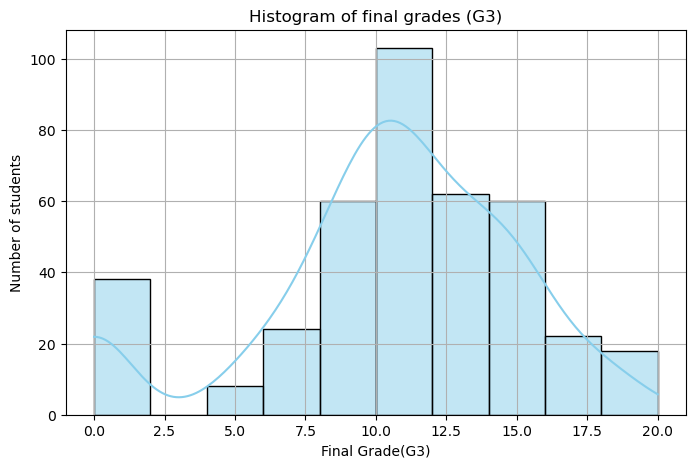

In [16]:
#plotting histogram of final grades G3
plt.figure(figsize=(8,5))
sns.histplot(df['G3'],bins=10,kde=True,color='skyblue')
plt.title('Histogram of final grades (G3)')
plt.xlabel('Final Grade(G3)')
plt.ylabel('Number of students')
plt.grid(True)
plt.show()

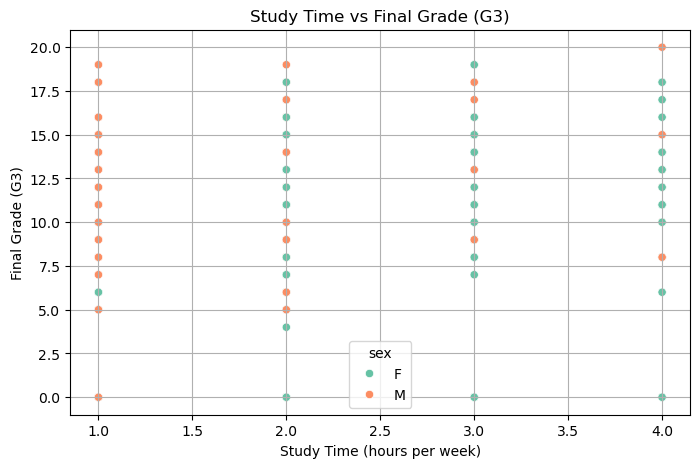

In [17]:
#scatter plot of study time vs G3
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='studytime',y='G3',hue='sex',palette='Set2')
plt.title('Study Time vs Final Grade (G3)')
plt.xlabel('Study Time (hours per week)')
plt.ylabel('Final Grade (G3)')
plt.grid(True)
plt.show()

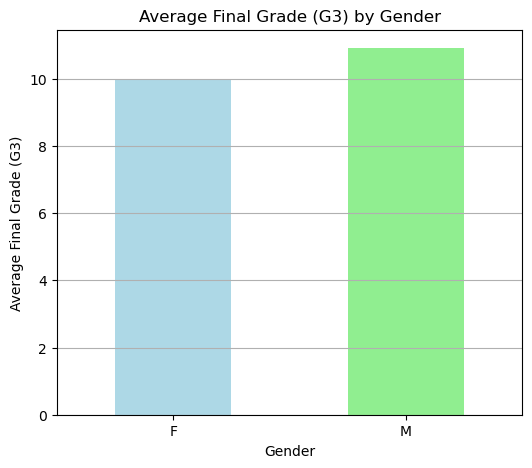

In [18]:
# Bar chart comparing average scores by gender
avg_g3_by_gender = df.groupby('sex')['G3'].mean()

plt.figure(figsize=(6,5))
avg_g3_by_gender.plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Average Final Grade (G3) by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade (G3)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()
